In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from vega_datasets import data

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


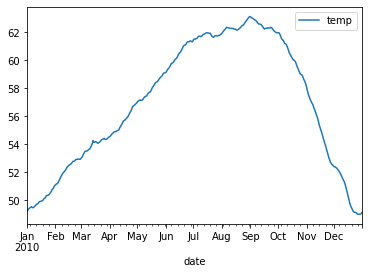

In [6]:
df.resample('D').mean().plot()
plt.show()

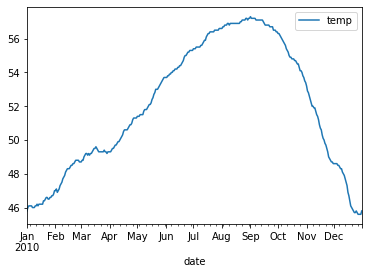

In [7]:
df.resample('D').min().plot()
plt.show()

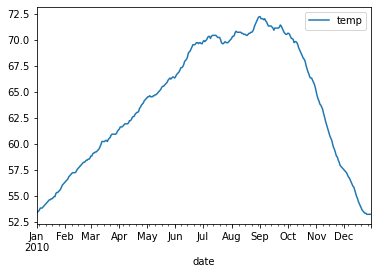

In [8]:
df.resample('D').max().plot()
plt.show()

In [9]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [10]:
df['month'] = df.index.month_name()
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January


In [11]:
df.groupby('month').mean().idxmin()

temp    January
dtype: object

In [12]:
df.groupby('month').mean().sort_values('temp').head(1).reset_index()

,month,temp
0,January,49.98414


In [13]:
df.groupby('month').mean().idxmax()

temp    September
dtype: object

In [14]:
df.groupby('month').mean().max()

temp    62.487083
dtype: float64

In [15]:
df.groupby('month').mean().sort_values('temp').tail(1).reset_index()

,month,temp
0,September,62.487083


In [16]:
daily_df = df.resample('D').agg(['min','max']).temp
daily_df.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [17]:
daily_df['temp_diff'] = daily_df['max'] - daily_df['min']
daily_df.head()

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [18]:
daily_df['month'] = daily_df.index.month_name()

In [19]:
daily_df.head()

,min,max,temp_diff,month
date,,,,
2010-01-01,45.8,53.3,7.5,January
2010-01-02,46.0,53.4,7.4,January
2010-01-03,46.1,53.5,7.4,January
2010-01-04,46.1,53.6,7.5,January
2010-01-05,46.1,53.8,7.7,January


In [20]:
daily_df.groupby('month').max().sort_values('temp_diff').tail(1)

,min,max,temp_diff
month,,,
August,57.2,72.2,15.0


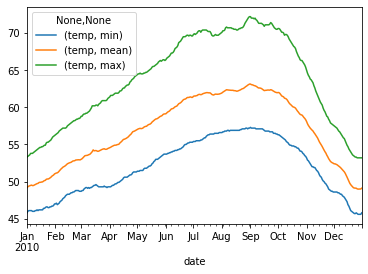

In [21]:
df.drop(columns='month').resample('D').agg(['min', 'mean','max']).plot()
plt.show()

#### Seattle Weather:

In [22]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [24]:
df = df.set_index('date')
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
